<H1> THE SPARKS FOUNDATION: DATA SCIENCE AND BUSINESS ANALYTICS </H1>
<H2><i> Task 2: Prediction using Unsupervised ML</i> </H2>

# **AIM:** Predict the optimum number of clusters and represent it visually.
<br>

**Author:** **Sukhdeep Kaur Sahmey** <br>
**Language Used:** Python 3 <br>
**IDE:** Jupyter Notebook <br>
**TYPE:** Linear Regression <br>


In [1]:

#Loading all the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

print("Libraries successfully imported")

Libraries successfully imported


In [2]:
#Loading the dataset
Iris_dataset = pd.read_csv("Iris.csv")

In [3]:
#Dataset data printed below
print("Student hours and scores dataset imported successfully")
Iris_dataset

Student hours and scores dataset imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#datatypes of all the different columns
Iris_dataset.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
#shape of the dataset
Iris_dataset.shape

(150, 6)

In [6]:
#checking the null value
Iris_dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#descriptive analysis of the dataset
Iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#first 10 records 
Iris_dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
#last 10 records
Iris_dataset.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
Iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
#removing the last column of the data for proper analysis of the outliers

Iris_dataset = Iris_dataset[Iris_dataset.columns[:-1]]

<h5>We use the function sns.boxplot() to plot the box plot in seaborn library.

The stripplot() function adds the dots, which clearly gives more info on the distribution of points. In this case, the distribution appears to be fairly uniform, but we can’t say for sure with just this </h5>

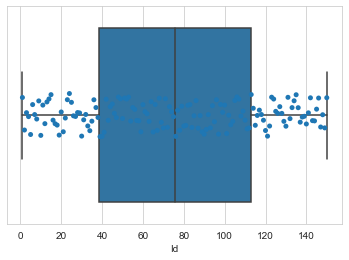

In [12]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='Id',data=Iris_dataset)
ax = sns.stripplot(x='Id', data=Iris_dataset)

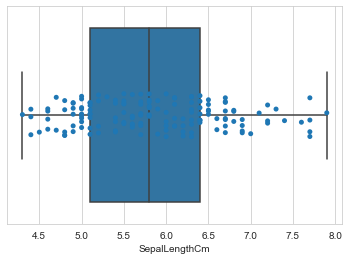

In [13]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='SepalLengthCm',data=Iris_dataset)
ax = sns.stripplot(x='SepalLengthCm', data=Iris_dataset)

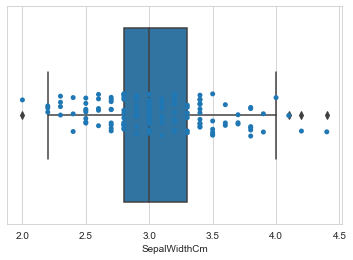

In [14]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='SepalWidthCm',data=Iris_dataset)
ax = sns.stripplot(x='SepalWidthCm', data=Iris_dataset)

<h5>There are outliers in SepalwidthCm as we can see that there are dots outside the whiskers.</h5>

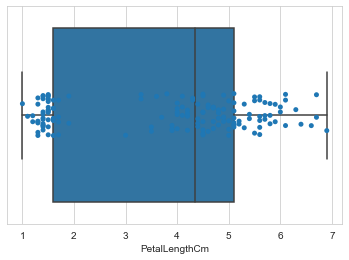

In [15]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='PetalLengthCm', data=Iris_dataset)
ax = sns.stripplot(x='PetalLengthCm', data=Iris_dataset)

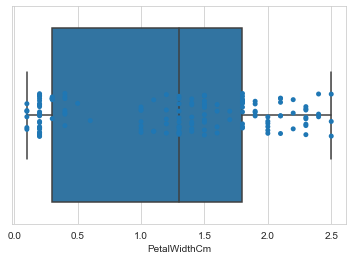

In [16]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='PetalWidthCm', data=Iris_dataset)
ax = sns.stripplot(x='PetalWidthCm', data=Iris_dataset)

In [17]:
#checking the null values
Iris_dataset.isnull == True

False

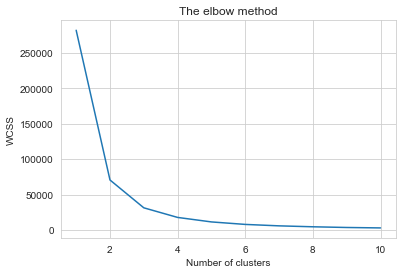

In [18]:
# Finding the optimum number of clusters for k-means classification

X1 = Iris_dataset.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

<h5>You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

the custer which is relevant to choose is cluster= 3</h5>

In [22]:


kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X1)

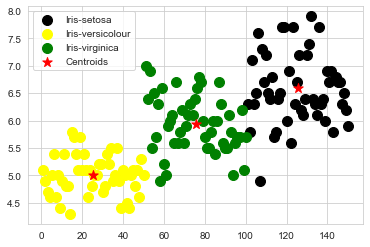

In [23]:
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 100, c = 'black', label = 'Iris-setosa')

plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 100, c = 'yellow', label = 'Iris-versicolour')

plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids', marker='*')

plt.legend()